In [1]:
import os
import xml.etree.ElementTree as ET
from pathlib import Path

In [2]:
import cv2 as cv
from dataclasses import dataclass, field
from typing import List
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [4]:
annotation_path = "../data/raw/VOC2007/Annotations/000001.xml"
tree = ET.parse(annotation_path)

In [5]:
root = tree.getroot()

In [6]:
root.find("filename").text

'000001.jpg'

In [7]:
objects = []
for obj in root.findall("object"):
    class_name = obj.find("name").text
    bbox = obj.find("bndbox")
    xmin = int(bbox.find("xmin").text)
    ymin = int(bbox.find("ymin").text)
    xmax = int(bbox.find("xmax").text)
    ymax = int(bbox.find("ymax").text)
    objects.append({"class": class_name, "bbox": [xmin, ymin, xmax, ymax]})

In [8]:
objects

[{'class': 'dog', 'bbox': [48, 240, 195, 371]},
 {'class': 'person', 'bbox': [8, 12, 352, 498]}]

In [9]:
image_path = "../data/raw/VOC2007/JPEGImages/000001.jpg"  # Example


In [10]:
image = cv.imread(image_path)

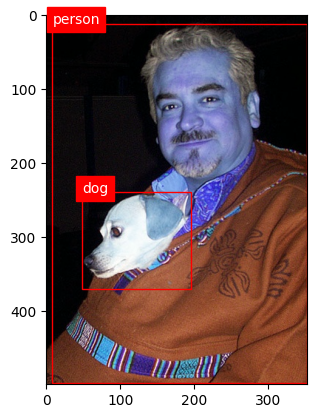

In [11]:
# Create a figure and axes for visualization
fig, ax = plt.subplots(1)
ax.imshow(image)

# Draw bounding boxes
for obj in objects:
    xmin, ymin, xmax, ymax = obj["bbox"]
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)
    ax.text(xmin, ymin, obj["class"], color="white", fontsize=10, backgroundcolor="red")
    
plt.grid(False)
plt.show()

In [12]:
# Define data structure
@dataclass
class BoundingBox:
    xmin: int
    ymin: int
    xmax: int
    ymax: int

@dataclass
class ObjectAnnotation:
    class_name: str
    bbox: BoundingBox

@dataclass
class ImageData:
    filename: str
    filepath: str
    width: int
    height: int
    image: np.ndarray = None
    objects: List[ObjectAnnotation] = field(default_factory=list)

In [13]:
image_path = Path.cwd()
str(image_path.parent / "data/raw")

'/home/joluseti/projects/object-detection-tracking/data/raw'

In [14]:
ROOT_DIR = Path.cwd().parent
image_path = ROOT_DIR / "data" / "raw" / "VOC2007" / "JPEGImages"
annotation_path = ROOT_DIR / "data"/"raw"/"VOC2007" /"Annotations"

In [15]:
image_path

PosixPath('/home/joluseti/projects/object-detection-tracking/data/raw/VOC2007/JPEGImages')

In [16]:
root.find("object/bndbox/xmin").text

'48'

In [17]:
def get_sample(image_path, annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    filename = root.find("filename").text
    filepath = image_path
    width = int(root.find("size/width").text)
    height = int(root.find("size/height").text)
    image = cv.imread(image_path)
    objects = []
    
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        xmin = int(obj.find("bndbox/xmin").text)
        ymin = int(obj.find("bndbox/ymin").text)
        xmax = int(obj.find("bndbox/xmax").text)
        ymax = int(obj.find("bndbox/ymax").text)
        objects.append(ObjectAnnotation(class_name, BoundingBox(xmin, ymin, xmax, ymax)))
    
    return ImageData(filename, filepath, width, height, image, objects)



    

In [18]:
test_image = list(image_path.rglob("*"))[0]
test_annot = list(annotation_path.rglob("*"))[0]

In [19]:
test = get_sample(image_path=test_image, annotation_path=test_annot)

In [20]:
test_annot

PosixPath('/home/joluseti/projects/object-detection-tracking/data/raw/VOC2007/Annotations/000001.xml')

In [21]:
test = ET.parse(str(test_annot))

In [22]:
test

In [23]:
def create_data_splits(dataset_root):

    try:
        dataset_root = Path(dataset_root)
        voc_07_dir = dataset_root / "VOC2007"
        voc_12_dir = dataset_root / "VOC2012"
        voc_07_image_dir = voc_07_dir / "JPEGImages"
        voc_12_image_dir = voc_12_dir / "JPEGImages"
        voc_07_annotation_dir = voc_07_dir / "Annotations"
        voc_12_annotation_dir = voc_12_dir / "Annotations"
        voc_07_data_dir = voc_07_dir / "ImageSets" / "Main"
        voc_12_data_dir = voc_12_dir / "ImageSets" / "Main"
        
        train_file_07 = voc_07_data_dir / "trainval.txt"
        train_file_12 = voc_12_data_dir / "trainval.txt"
        test_file = voc_07_data_dir / "test.txt"

    except (ValueError) as e:
        raise ValueError(f"")


    train_paths_07 = [(voc_07_image_dir / f"{image_name}.jpg", voc_07_annotation_dir / f"{image_name}.xml") for image_name in train_file_07.read_text().splitlines() if image_name]
    train_paths_12 = [(voc_12_image_dir / f"{image_name}.jpg", voc_12_annotation_dir / f"{image_name}.xml") for image_name in train_file_12.read_text().splitlines() if image_name]

    train_paths = train_paths_07 + train_paths_12

    test_paths = [(voc_07_image_dir / f"{image_name}.jpg", voc_07_annotation_dir / f"{image_name}.xml") for image_name in test_file.read_text().splitlines() if image_name]

    train_data = []
    test_data = []

    for image_path, annotation_path in train_paths:
        data_sample = get_sample(image_path, annotation_path)
        train_data.append(data_sample)

    for image_path, annotation_path in test_paths:
        data_sample = get_sample(image_path, annotation_path)
        test_data.append(data_sample)
    
    return train_data, test_data 

In [77]:
train_data, test_data = create_data_splits(dataset_root = ROOT_DIR / "data" / "raw")

In [24]:
Path(ROOT_DIR).resolve()

PosixPath('/home/joluseti/projects/object-detection-tracking')

In [32]:
Path(ROOT_DIR).resolve()

PosixPath('/home/joluseti/projects/object-detection-tracking')

In [79]:
len(train_data)

16551

In [80]:
len(test_data)

4952

In [72]:
test_path = ROOT_DIR / "data" / "raw" / "VOC2007" / "ImageSets" / "Main" / "test.txt"
Path(test_path)

PosixPath('/home/joluseti/projects/object-detection-tracking/data/raw/VOC2007/ImageSets/Main/test.txt')

In [71]:
len(["".join([image, ".jpg"]) for image in test_path.read_text().split("\n")])

4953

In [73]:
len([image + ".jpg" for image in test_path.read_text().splitlines()])

4952

In [1]:
from tqdm.notebook import tqdm

In [6]:
import time

for i in tqdm(range(1000), desc="Processing"):
    time.sleep(0.01)  # Simulate some work

Processing:   0%|          | 0/1000 [00:00<?, ?it/s]